In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Question 1 - Extracting Tesla Stock Data Using yfinance 
tesla =yf.Ticker("TSLA")
tesla_data = tesla.history (period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping 
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [9]:
Soup = BeautifulSoup(html_data, 'html.parser')

In [6]:
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [10]:
for row in Soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    Tesla_revenue = pd.concat([Tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [11]:
tesla_revenue = pd.read_html(str(Soup))

print (tesla_revenue)

[    Tesla Annual Revenue (Millions of US $)  \
0                                      2021   
1                                      2020   
2                                      2019   
3                                      2018   
4                                      2017   
5                                      2016   
6                                      2015   
7                                      2014   
8                                      2013   
9                                      2012   
10                                     2011   
11                                     2010   
12                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
0                                    $53,823  
1                                    $31,536  
2                                    $24,578  
3                                    $21,461  
4                                    $11,759  
5                                     $7,000  
6          

/var/folders/kv/p_pj978s167fq04q5hvckfsh0000gn/T/ipykernel_11201/1460122062.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(Soup))


In [12]:
tesla_revenue_cleaned = tesla_revenue[1]  

tesla_revenue_cleaned["Revenue"] = (
    tesla_revenue_cleaned["Tesla Quarterly Revenue (Millions of US $).1"]
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

tesla_revenue_cleaned.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1,Revenue
0,2022-09-30,"$21,454",21454.0
1,2022-06-30,"$16,934",16934.0
2,2022-03-31,"$18,756",18756.0
3,2021-12-31,"$17,719",17719.0
4,2021-09-30,"$13,757",13757.0


In [13]:
tesla_revenue_cleaned.dropna(inplace=True)

tesla_revenue_cleaned = tesla_revenue_cleaned[tesla_revenue_cleaned['Revenue'] != ""]

In [14]:
print (tesla_revenue_cleaned)

   Tesla Quarterly Revenue (Millions of US $)  \
0                                  2022-09-30   
1                                  2022-06-30   
2                                  2022-03-31   
3                                  2021-12-31   
4                                  2021-09-30   
5                                  2021-06-30   
6                                  2021-03-31   
7                                  2020-12-31   
8                                  2020-09-30   
9                                  2020-06-30   
10                                 2020-03-31   
11                                 2019-12-31   
12                                 2019-09-30   
13                                 2019-06-30   
14                                 2019-03-31   
15                                 2018-12-31   
16                                 2018-09-30   
17                                 2018-06-30   
18                                 2018-03-31   
19                  

In [15]:
# Question 3 - Extracting GameStop Stock Data Using yfinance
GameStop =yf.Ticker("GME")
gme_data = GameStop.history (period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [16]:
# Question 4 - Extracting GameStop Revenue Data Using Webscraping 
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [18]:
Soup_gme = BeautifulSoup(html_data_2, 'html.parser')

In [19]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [20]:
for row in Soup_gme.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [21]:
gme_revenue = pd.read_html(str(Soup_gme))

print(gme_revenue)

[    GameStop Annual Revenue (Millions of US $)  \
0                                         2020   
1                                         2019   
2                                         2018   
3                                         2017   
4                                         2016   
5                                         2015   
6                                         2014   
7                                         2013   
8                                         2012   
9                                         2011   
10                                        2010   
11                                        2009   
12                                        2008   
13                                        2007   
14                                        2006   
15                                        2005   

   GameStop Annual Revenue (Millions of US $).1  
0                                        $6,466  
1                                        $8,285 

/var/folders/kv/p_pj978s167fq04q5hvckfsh0000gn/T/ipykernel_11201/464374117.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(Soup_gme))


In [22]:
gme_revenue_cleaned = gme_revenue[1]  

gme_revenue_cleaned ["Revenue"] = (
    gme_revenue_cleaned ["GameStop Quarterly Revenue (Millions of US $).1"]
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

gme_revenue_cleaned.head()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1,Revenue
0,2020-04-30,"$1,021",1021.0
1,2020-01-31,"$2,194",2194.0
2,2019-10-31,"$1,439",1439.0
3,2019-07-31,"$1,286",1286.0
4,2019-04-30,"$1,548",1548.0


In [23]:
gme_revenue_cleaned.dropna(inplace=True)

gme_revenue_cleaned = gme_revenue_cleaned[gme_revenue_cleaned['Revenue'] != ""]

In [24]:
print(gme_revenue_cleaned)

   GameStop Quarterly Revenue (Millions of US $)  \
0                                     2020-04-30   
1                                     2020-01-31   
2                                     2019-10-31   
3                                     2019-07-31   
4                                     2019-04-30   
..                                           ...   
57                                    2006-01-31   
58                                    2005-10-31   
59                                    2005-07-31   
60                                    2005-04-30   
61                                    2005-01-31   

   GameStop Quarterly Revenue (Millions of US $).1  Revenue  
0                                           $1,021   1021.0  
1                                           $2,194   2194.0  
2                                           $1,439   1439.0  
3                                           $1,286   1286.0  
4                                           $1,548   1548.0  
.. 

In [25]:
# Question 5 - Tesla Stock and Revenue Dashboard
import matplotlib.pyplot as plt

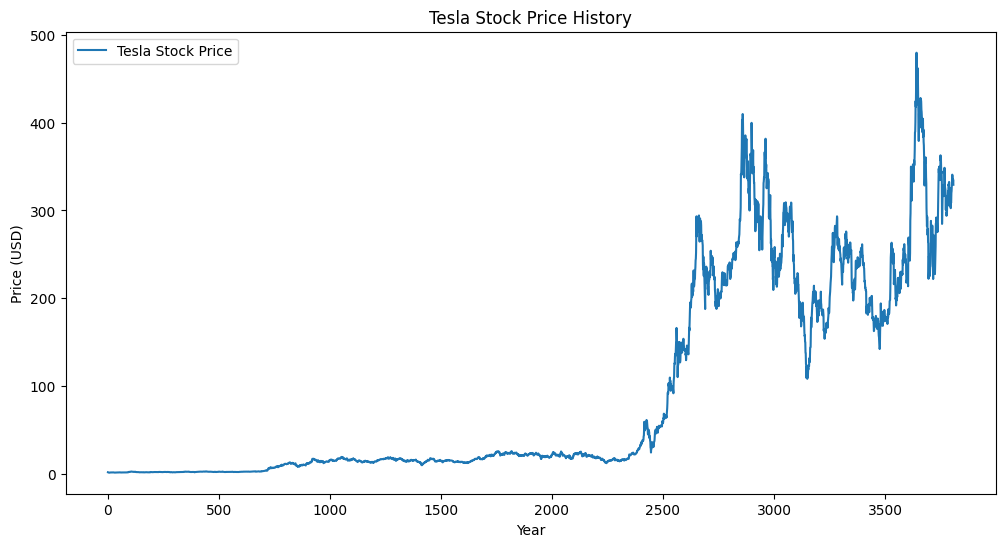

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(tesla_data.index, tesla_data["Close"], label="Tesla Stock Price") 
plt.title("Tesla Stock Price History") 
plt.xlabel("Year") 
plt.ylabel("Price (USD)") 
plt.legend() 
plt.show()

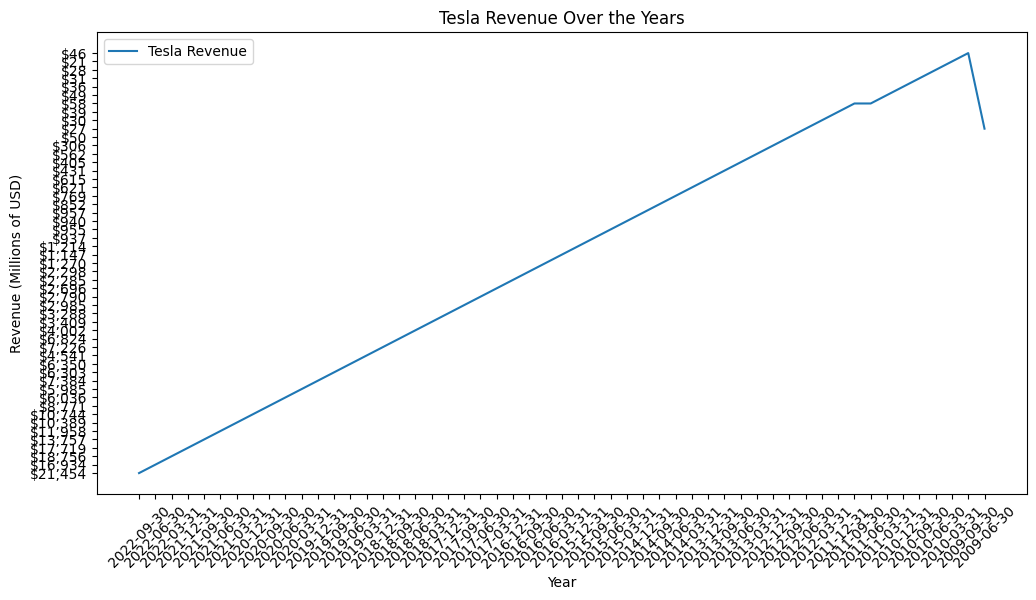

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_revenue_cleaned.iloc[:,0], tesla_revenue_cleaned.iloc[:,1], label="Tesla Revenue")
plt.title("Tesla Revenue Over the Years")
plt.xlabel("Year")
plt.ylabel("Revenue (Millions of USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [27]:
# Question 6 - GameStop Stock and Revenue Dashboard
import matplotlib.pyplot as plt

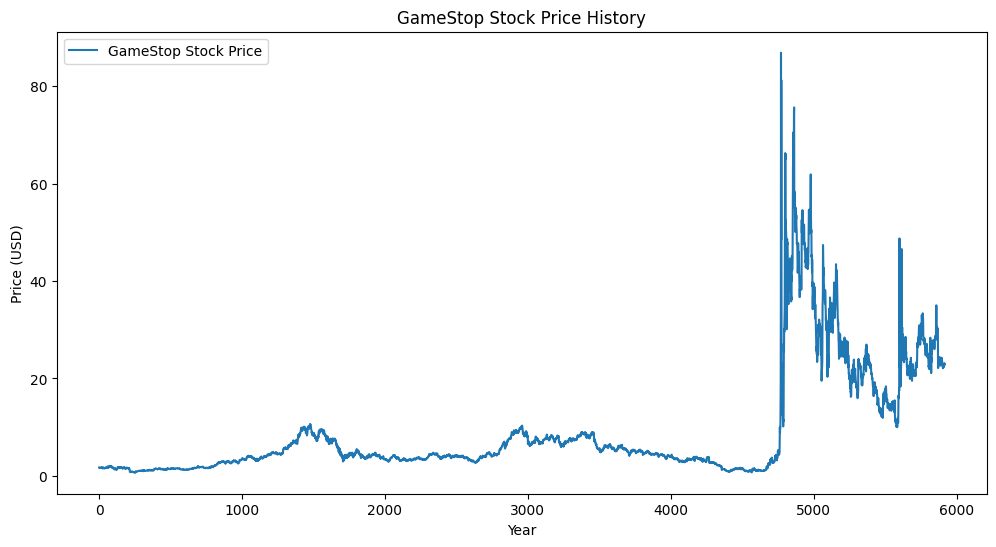

In [28]:
plt.figure(figsize=(12,6)) 
plt.plot (gme_data.index, gme_data["Close"], label="GameStop Stock Price")
plt.title ("GameStop Stock Price History") 
plt.xlabel ("Year") 
plt.ylabel ("Price (USD)") 
plt.legend ( ) 
plt.show()

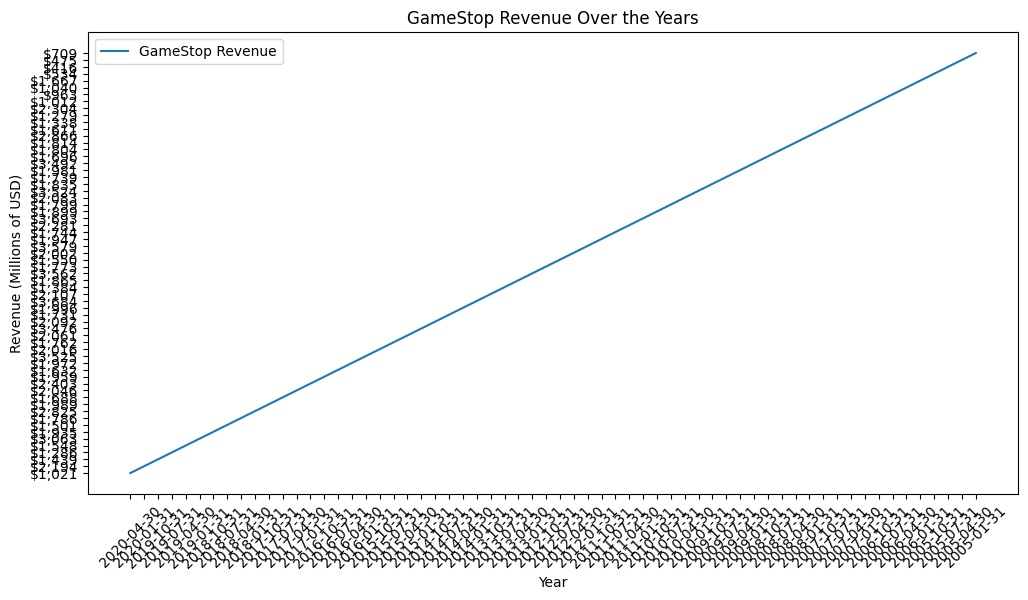

In [29]:
plt.figure(figsize=(12, 6)) 
plt.plot(gme_revenue_cleaned.iloc[:,0], gme_revenue_cleaned.iloc[:,1], label="GameStop Revenue") 
plt.title("GameStop Revenue Over the Years") 
plt.xlabel("Year") 
plt.ylabel("Revenue (Millions of USD)") 
plt.xticks(rotation=45) 
plt.legend() 
plt.show()